# TF-IDF Scripts

### Import Libraries

In [351]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize, pos_tag_sents, pos_tag
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import sys
!{sys.executable} -m pip install detoxify

from detoxify import Detoxify
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Custom Functions and File Imports

In [352]:
stemming = PorterStemmer()
stops = set(stopwords.words("english")) 
counters = []

def removeStopWords(row):
    stemmed = row['stemmed']
    cleaned = [w for w in stemmed if not w in stops]
    cleaned = listToString(cleaned)
    return cleaned

def tokenize(row):
    message = row['message'].lower()
    tokens = word_tokenize(message)
    tok_words = [w for w in tokens if w.isalpha()]
    return tok_words
    
def stem(row):
    tokens = row['tokenized']
    stemmed = [stemming.stem(word) for word in tokens]
    return stemmed

def listToString(lst):
    text = ' '.join(lst)
    return text

def posTag(row):
    message = row['message']
    tokens = word_tokenize(message)
    tagged = nltk.pos_tag(tokens)
    return tagged

def posCounter(row):
    message = row['message']
    tokens = word_tokenize(message)
    tagged = nltk.pos_tag(tokens)
    counts = Counter( tag for word,  tag in tagged)
    counters.append(counts)

In [353]:
os.chdir(r"D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\foxnews1") # CHANGE VALUE PER BATCH
files = []
for file in glob.glob("*.csv"):
    print(file)
    files.append(file)
    
print(files)    

annotatorA.csv
annotatorB.csv
annotatorC.csv
['annotatorA.csv', 'annotatorB.csv', 'annotatorC.csv']


In [354]:
coder1 = pd.read_csv(files[0])
coder1.fillna(0)
coder2 = pd.read_csv(files[1])
coder2.fillna(0)
#coder3 = pd.read_excel('usanews0full_3.xlsx')
coder3 = pd.read_csv(files[2])
coder3.fillna(0)

,Unnamed: 0,message,author,time_text,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,0,?,username@eesesatees,00:15:00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,fox fail,username@EPTTALHTTE,01:00:00,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Tell baby clown boy to get out,username@NiC eeeie,01:26:00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,awe are you poor losers upset you lost the ele...,username@oHeysy yoo,01:28:00,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Biden won bigly,username@RRRnanRaRR,01:52:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
60,60,eew,username@MtuuUhMggS,06:47:00,0.0,0.0,0.0,0.0,0.0,0.0
61,61,Entire election was rigged,username@oGoyyJiaoa,06:47:00,0.0,0.0,0.0,0.0,0.0,0.0
62,62,CULT45 SQUARELY BEHIND THE 🎱 ON THE U.S. ELECT...,username@uwwaDsggSS,06:57:00,0.0,0.0,0.0,0.0,0.0,0.0
63,63,Busted!,username@gViKnKViep,06:57:00,0.0,0.0,0.0,0.0,0.0,0.0


### Combine Documents Per Label

In [355]:
dHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Direct Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Direct Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Direct Harassment'] == 1.0]

dHarassment = pd.concat([temp0, temp1, temp2])
dHarassment.drop(dHarassment.columns.difference(['Unnamed: 0', 'message','Direct Harassment']), 1, inplace=True)

dHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
dHarassment
#duplicateRowsDF = dHarassment[dHarassment.duplicated()]
#duplicateRowsDF

,Unnamed: 0,message,Direct Harassment


In [356]:
hSpeech = pd.DataFrame()
temp0 = coder1.loc[coder1['Hate Speech'] == 1.0]
temp1 = coder2.loc[coder2['Hate Speech'] == 1.0]
temp2 = coder3.loc[coder3['Hate Speech'] == 1.0]

hSpeech = pd.concat([temp0, temp1, temp2])
hSpeech.drop(hSpeech.columns.difference(['Unnamed: 0', 'message','Hate Speech']), 1, inplace=True)

hSpeech.drop_duplicates(subset ="message", keep = False, inplace = True)
hSpeech

,Unnamed: 0,message,Hate Speech
20,20,of course Trump lost. He is a lunatic. Most Am...,1.0
21,21,Biden and his supporters will always have to l...,1.0
52,52,Biden cheated,1.0
55,55,youtube is doing this on purpose...making it h...,1.0


In [357]:
sHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Sexual Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Sexual Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Sexual Harassment'] == 1.0]

sHarassment = pd.concat([temp0, temp1, temp2])
sHarassment.drop(sHarassment.columns.difference(['Unnamed: 0', 'message','Sexual Harassment']), 1, inplace=True)

sHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
sHarassment

,Unnamed: 0,message,Sexual Harassment


In [358]:
trolling = pd.DataFrame()
temp0 = coder1.loc[coder1['Trolling'] == 1.0]
temp1 = coder2.loc[coder2['Trolling'] == 1.0]
temp2 = coder3.loc[coder3['Trolling'] == 1.0]

trolling = pd.concat([temp0, temp1, temp2])
trolling.drop(trolling.columns.difference(['Unnamed: 0', 'message','Trolling']), 1, inplace=True)

trolling.drop_duplicates(subset ="message", keep = False, inplace = True)
trolling

,Unnamed: 0,message,Trolling
21,21,Biden and his supporters will always have to l...,1.0
25,25,Biden 2020-2028 Kamala 2028-2036,1.0
34,34,Trump will be president for 12 more years,1.0
36,36,Kamala was picked based on gender and race...n...,1.0


In [359]:
others = pd.DataFrame()
temp0 = coder1.loc[coder1['Others'] == 1.0]
temp1 = coder2.loc[coder2['Others'] == 1.0]
temp2 = coder3.loc[coder3['Others'] == 1.0]

others = pd.concat([temp0, temp1, temp2])
others.drop(others.columns.difference(['Unnamed: 0', 'message','Others']), 1, inplace=True)

others.drop_duplicates(subset ="message", keep = False, inplace = True)
others

,Unnamed: 0,message,Others


In [360]:
toxic = pd.DataFrame()
temp0 = coder1.loc[coder1['Toxic'] == 1.0]
temp1 = coder2.loc[coder2['Toxic'] == 1.0]
temp2 = coder3.loc[coder3['Toxic'] == 1.0]

toxic = pd.concat([temp0, temp1, temp2])
toxic.drop(toxic.columns.difference(['Unnamed: 0', 'message','Toxic']), 1, inplace=True)

toxic.drop_duplicates(subset ="message", keep = False, inplace = True)
toxic

,Unnamed: 0,message,Toxic


## NLP Text Processing Stuff


In [361]:
if not dHarassment.empty:
    dHarassment['tokenized'] = dHarassment.apply(tokenize, axis=1)
    dHarassment['stemmed'] = dHarassment.apply(stem, axis=1)
    dHarassment['stop_words'] = dHarassment.apply(removeStopWords, axis=1)
dHarassment

,Unnamed: 0,message,Direct Harassment


In [362]:
if not hSpeech.empty:
    hSpeech['tokenized'] = hSpeech.apply(tokenize, axis=1)
    hSpeech['stemmed'] = hSpeech.apply(stem, axis=1)
    hSpeech['stop_words'] = hSpeech.apply(removeStopWords, axis=1)
hSpeech

,Unnamed: 0,message,Hate Speech,tokenized,stemmed,stop_words
20,20,of course Trump lost. He is a lunatic. Most Am...,1.0,"[of, course, trump, lost, he, is, a, lunatic, ...","[of, cours, trump, lost, he, is, a, lunat, mos...",cours trump lost lunat american see
21,21,Biden and his supporters will always have to l...,1.0,"[biden, and, his, supporters, will, always, ha...","[biden, and, hi, support, will, alway, have, t...",biden hi support alway live shame cheat america
52,52,Biden cheated,1.0,"[biden, cheated]","[biden, cheat]",biden cheat
55,55,youtube is doing this on purpose...making it h...,1.0,"[youtube, is, doing, this, on, purpose, making...","[youtub, is, do, thi, on, purpos, make, it, ha...",youtub thi purpos make hard hear


In [363]:
if not sHarassment.empty:
    sHarassment['tokenized'] = sHarassment.apply(tokenize, axis=1)
    sHarassment['stemmed'] = sHarassment.apply(stem, axis=1)
    sHarassment['stop_words'] = sHarassment.apply(removeStopWords, axis=1)
sHarassment

,Unnamed: 0,message,Sexual Harassment


In [364]:
if not trolling.empty:
    print('test')
    trolling['tokenized'] = trolling.apply(tokenize, axis=1)
    trolling['stemmed'] = trolling.apply(stem, axis=1)
    trolling['stop_words'] = trolling.apply(removeStopWords, axis=1)
trolling

test


,Unnamed: 0,message,Trolling,tokenized,stemmed,stop_words
21,21,Biden and his supporters will always have to l...,1.0,"[biden, and, his, supporters, will, always, ha...","[biden, and, hi, support, will, alway, have, t...",biden hi support alway live shame cheat america
25,25,Biden 2020-2028 Kamala 2028-2036,1.0,"[biden, kamala]","[biden, kamala]",biden kamala
34,34,Trump will be president for 12 more years,1.0,"[trump, will, be, president, for, more, years]","[trump, will, be, presid, for, more, year]",trump presid year
36,36,Kamala was picked based on gender and race...n...,1.0,"[kamala, was, picked, based, on, gender, and, ...","[kamala, wa, pick, base, on, gender, and, race...",kamala wa pick base gender race merit


In [365]:
if not others.empty:
    others['tokenized'] = others.apply(tokenize, axis=1)
    others['stemmed'] = others.apply(stem, axis=1)
    others['stop_words'] = others.apply(removeStopWords, axis=1)
others

,Unnamed: 0,message,Others


In [366]:
if not toxic.empty:
    toxic['tokenized'] = toxic.apply(tokenize, axis=1)
    toxic['stemmed'] = toxic.apply(stem, axis=1)
    toxic['stop_words'] = toxic.apply(removeStopWords, axis=1)
    toxic['pos'] = toxic.apply(posTag, axis=1)
    toxic.apply(posCounter, axis=1)
    print(sum(counters, Counter()))
toxic

,Unnamed: 0,message,Toxic


### TFIDF Stuff

#### TFIDF On Direct Harassment

In [367]:
#no text processing
df = pd.DataFrame()
if not dHarassment.empty:
    vectorizer = TfidfVectorizer()
    dHar = vectorizer.fit_transform(dHarassment['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(dHar.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [368]:
#stop words removed
df1 = pd.DataFrame()
if not dHarassment.empty:
    vectorizer = TfidfVectorizer()
    dHar = vectorizer.fit_transform(dHarassment['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(dHar.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

In [369]:
df.head()

""


In [370]:
df1.head()

""


In [371]:
if not dHarassment.empty:
    vals = vals[0:10]
    vals.plot.bar()

In [372]:
if not dHarassment.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Hate Speech

In [373]:
df = pd.DataFrame()
if not hSpeech.empty:
    vectorizer = TfidfVectorizer()
    hSpe = vectorizer.fit_transform(hSpeech['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(hSpe.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [374]:
#stop words removed
df1 = pd.DataFrame()
if not hSpeech.empty:
    vectorizer = TfidfVectorizer()
    hSpe = vectorizer.fit_transform(hSpeech['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(hSpe.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

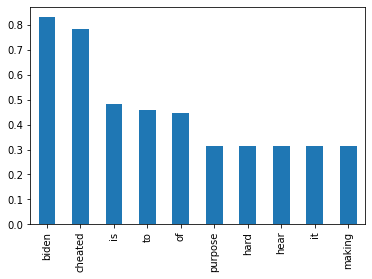

In [375]:
if not hSpeech.empty:
    vals = vals[0:10]
    vals.plot.bar()

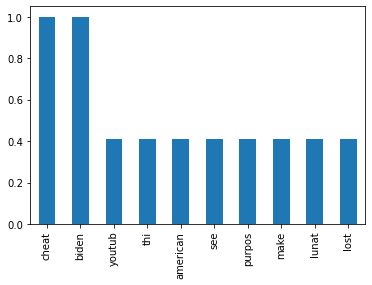

In [376]:
if not hSpeech.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Sexual Harassment

In [377]:
df = pd.DataFrame()
if not sHarassment.empty:
    vectorizer = TfidfVectorizer()
    sHar = vectorizer.fit_transform(sHarassment['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(sHar.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [378]:
#stop words removed
df1 = pd.DataFrame()
if not sHarassment.empty:
    vectorizer = TfidfVectorizer()
    sHar = vectorizer.fit_transform(sHarassment['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(sHar.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

In [379]:
if not sHarassment.empty:
    vals = vals[0:10]
    vals.plot.bar()

In [380]:
if not sHarassment.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Trolling

In [381]:
df = pd.DataFrame()
if not trolling.empty:
    vectorizer = TfidfVectorizer()
    troll = vectorizer.fit_transform(trolling['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(troll.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [382]:
#stop words removed
df1 = pd.DataFrame()
if not trolling.empty:
    vectorizer = TfidfVectorizer()
    troll = vectorizer.fit_transform(trolling['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(troll.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

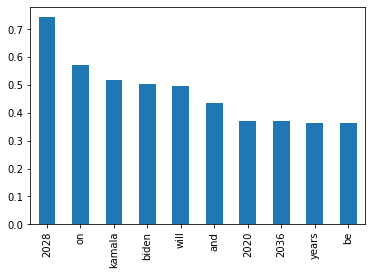

In [383]:
if not trolling.empty:
    vals = vals[0:10]
    vals.plot.bar()

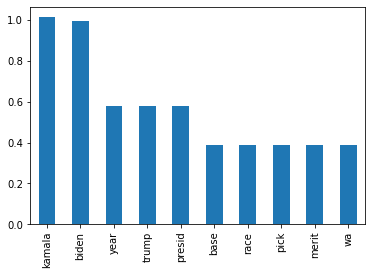

In [384]:
if not trolling.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Others

In [385]:
df = pd.DataFrame()
if not others.empty:
    vectorizer = TfidfVectorizer()
    oth = vectorizer.fit_transform(others['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(oth.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [386]:
#stop words removed
df1 = pd.DataFrame()
if not others.empty:
    vectorizer = TfidfVectorizer()
    oth = vectorizer.fit_transform(others['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(oth.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

In [387]:
if not others.empty:
    vals = vals[0:10]
    vals.plot.bar()

In [388]:
if not others.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

#### TFIDF on Toxic

In [389]:
df = pd.DataFrame()
if not toxic.empty:
    vectorizer = TfidfVectorizer()
    tox = vectorizer.fit_transform(toxic['message'])
    features = vectorizer.get_feature_names()
    df = pd.DataFrame(tox.toarray(), columns=features)
    vals = df.sum(axis = 0, skipna = True)
    vals = vals.sort_values(ascending=False)

In [390]:
#stop words removed
df1 = pd.DataFrame()
if not toxic.empty:
    vectorizer = TfidfVectorizer()
    tox = vectorizer.fit_transform(toxic['stop_words'])
    features = vectorizer.get_feature_names()
    df1 = pd.DataFrame(tox.toarray(), columns=features)
    vals1 = df1.sum(axis = 0, skipna = True)
    vals1 = vals1.sort_values(ascending=False)

In [391]:
if not toxic.empty:
    vals = vals[0:10]
    vals.plot.bar()

In [392]:
if not toxic.empty:
    vals1 = vals1[0:10]
    vals1.plot.bar()

In [393]:
if not toxic.empty:
    arr = toxic['message'].to_list()
    arr 
    len(arr)

In [394]:
if not toxic.empty:
    results = Detoxify('unbiased').predict(arr)
    newDF = pd.DataFrame(results, index=arr).round(5)
newDF

,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
Shame on you Fox News for denying the truth.,0.04698,0.0,0.0004,0.0003,0.02301,0.00053,0.00004
